***SET50 STOCK PRICE (WEB SCRAPING)***

mini-exercise for DE position (Davoy.tech)



In [20]:
!pip install bs4

In [21]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime

source: https://marketdata.set.or.th/mkt/sectorquotation.do

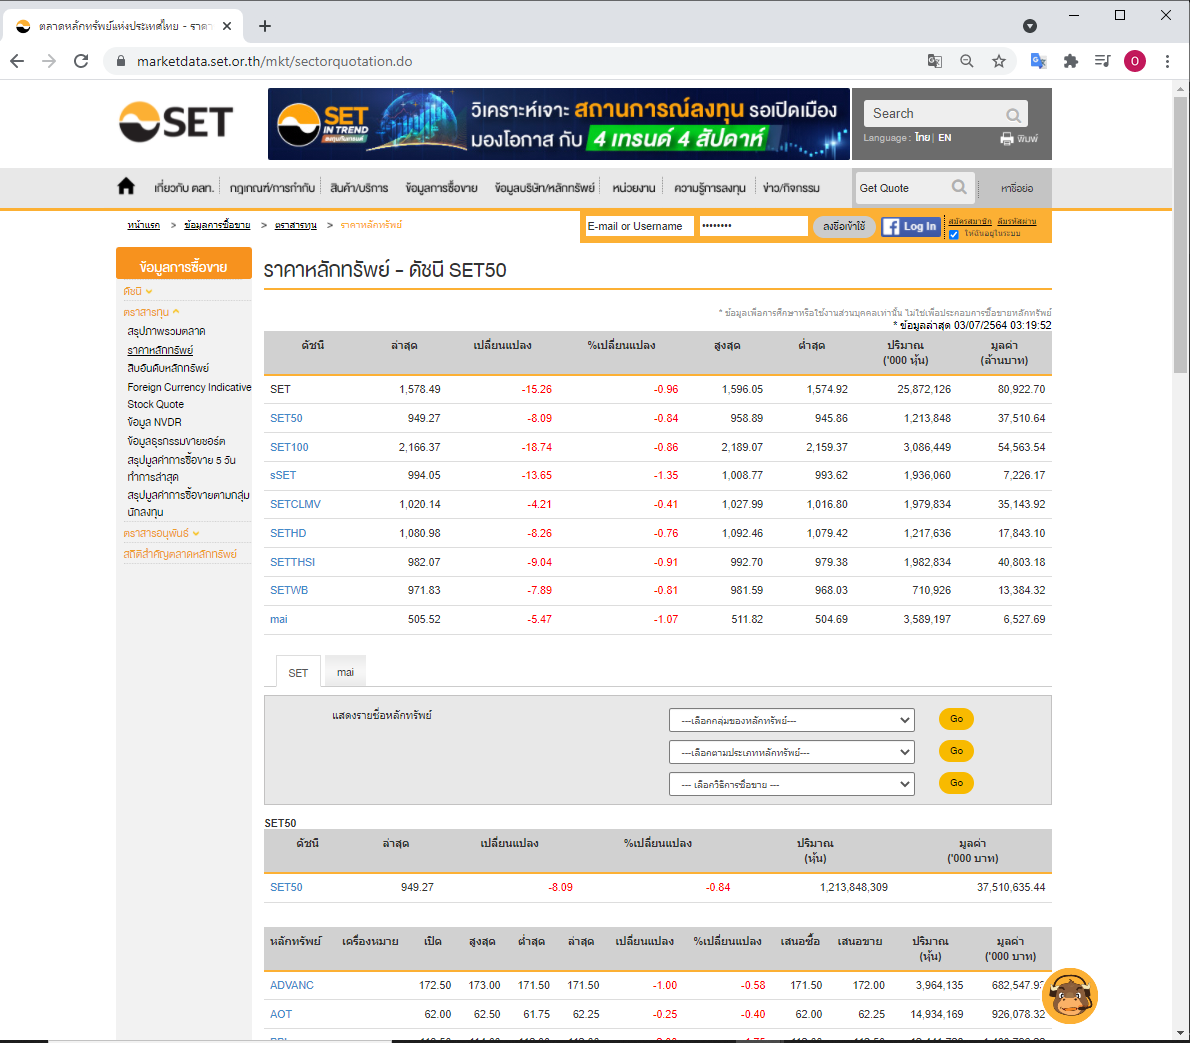

The table that want to be stored in the database.

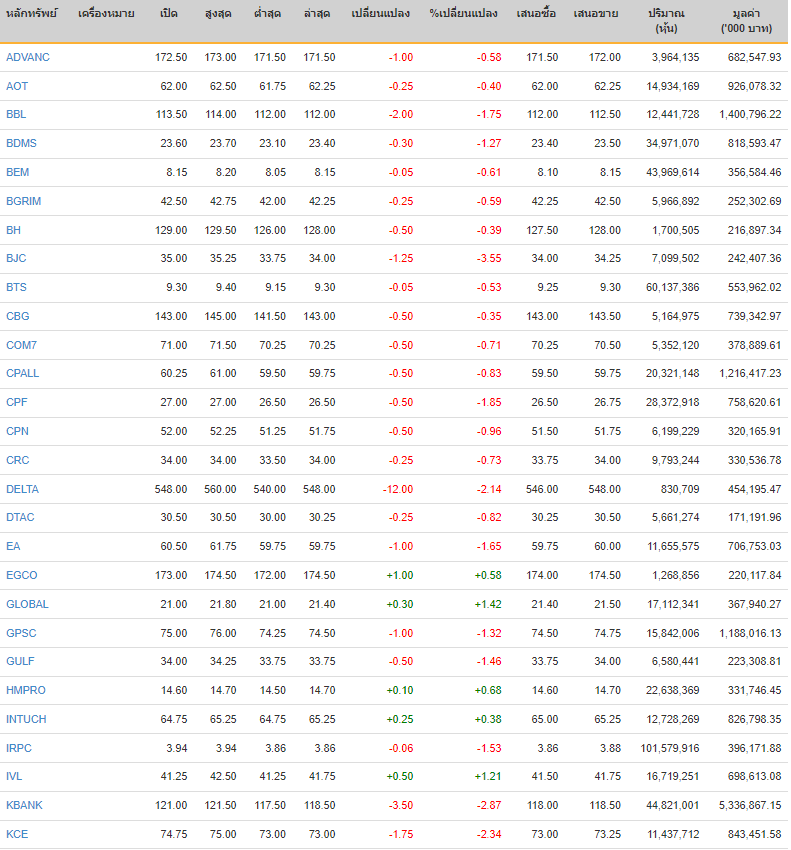

In [22]:
#Gather the contents of the webpage in text format
url = "https://marketdata.set.or.th/mkt/sectorquotation.do"
html_data  = requests.get(url).text 

In [23]:
#Use BeautifulSoup parse the contents of the webpage.
soup = BeautifulSoup(html_data,"html5lib")
#soup

In [24]:
#Use the empty dataframe data and the given loop extract the necessary data from each row and append it to the empty dataframe.
data = pd.DataFrame(columns=["Name", "Open","Max","Min","Lastest","Change","Change (Percent)","Bid","Offer","Volume","Marketcap ('000 THB)"])

for row in soup.find_all("tbody")[2].find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        name = col[0].text.strip()
        open = col[2].text
        max = col[3].text
        min = col[4].text
        lastest = col[5].text
        change = col[6].text
        change_percent = col[7].text
        bid = col[8].text
        offer = col[9].text
        volume = col[10].text
        marketcap = col[11].text
        data = data.append({"Name":name, "Open":open, "Max":max, "Min":min, "Lastest":lastest, "Change":change, "Change (Percent)":change_percent, "Bid":bid,"Offer":offer,"Volume":volume,"Marketcap ('000 THB)":marketcap}, ignore_index=True)

In [25]:
data

,Name,Open,Max,Min,Lastest,Change,Change (Percent),Bid,Offer,Volume,Marketcap ('000 THB)
0,ADVANC,172.50,173.00,171.50,171.50,-1.00,-0.58,171.50,172.00,"3,964,135","682,547.93"
1,AOT,62.00,62.50,61.75,62.25,-0.25,-0.40,62.00,62.25,"14,934,169","926,078.32"
2,BBL,113.50,114.00,112.00,112.00,-2.00,-1.75,112.00,112.50,"12,441,728","1,400,796.22"
3,BDMS,23.60,23.70,23.10,23.40,-0.30,-1.27,23.40,23.50,"34,971,070","818,593.47"
4,BEM,8.15,8.20,8.05,8.15,-0.05,-0.61,8.10,8.15,"43,969,614","356,584.46"
5,BGRIM,42.50,42.75,42.00,42.25,-0.25,-0.59,42.25,42.50,"5,966,892","252,302.69"
6,BH,129.00,129.50,126.00,128.00,-0.50,-0.39,127.50,128.00,"1,700,505","216,897.34"
7,BJC,35.00,35.25,33.75,34.00,-1.25,-3.55,34.00,34.25,"7,099,502","242,407.36"
8,BTS,9.30,9.40,9.15,9.30,-0.05,-0.53,9.25,9.30,"60,137,386","553,962.02"
9,CBG,143.00,145.00,141.50,143.00,-0.50,-0.35,143.00,143.50,"5,164,975","739,342.97"


In [26]:
#current date
datetime.now().strftime('%Y-%m-%d')

'2021-07-03'

In [27]:
#Save data to .csv file
data.to_csv(datetime.now().strftime('%Y-%m-%d') + "_set50_list_index.csv")

In [28]:
#Save data to .json file
data.to_json(datetime.now().strftime('%Y-%m-%d') + "_set50_list_index.json")

                                                        BY OLARN JIRASAWETPHAN

